# 1) Business Understanding

Quick Mart chain of supermarkets was founded three years ago and has made
tremendous growth over time. It currently runs three branches.

Create an analysis report that helps the management make a decision on the marketing strategy to undertake.


*  Provide insights on which product categories performed best, 
*  Which branches had the highest sales and profit
*  The trends of sales over time for each branch
*  The average amount spent by customers
*  The average rating for each branch

# 2) Data Exploration

In [ ]:
# PRE-REQUISITES

# importing seaborn for plotting
# ---
#
import seaborn as sns

# importing matplotlib for plotting
# ---
#
import matplotlib.pyplot as plt

# importing numpy for scientific computations
# ---
# 
import numpy as np

# importing pandas for data manipulation
# ---
# 
import pandas as pd

In [ ]:
# Reading the dataset and previewing the first five rows
quickmart = pd.read_csv('https://bit.ly/SupermarketsDS')
quickmart.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Checking datatypes and missing entries of all the variables
# ---
# 
quickmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Changing the 'Date' datatype to datetime
quickmart['date'] = pd.to_datetime(quickmart['Date']) 
quickmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
# Checking how many duplicate rows are there in the data
# ---
# 
duplicateRows_df = quickmart[quickmart.duplicated()]
print(duplicateRows_df)

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, date]
Index: []


# 3) Data Analysis and Visualisation






## a) Provide insights on which product categories performed best




In [ ]:
# Prepare: create a summary table of total quantity sold for each product category
summary_quantity = quickmart.groupby(['Product line'], as_index=False).agg({'Quantity': np.sum})
summary_quantity

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


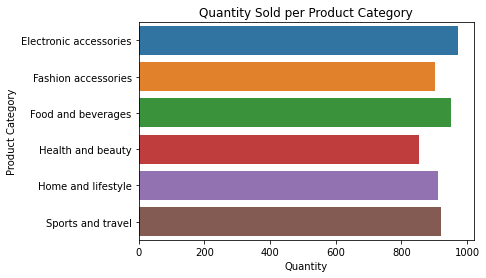

In [ ]:
# Render 
sns.barplot(data = summary_quantity, x = "Quantity", y = "Product line")

# Tweak and Label
plt.xlabel('Quantity')
plt.ylabel('Product Category')
plt.title('Quantity Sold per Product Category')

# Display
plt.show()

Observation:
Electronic accessories performed best

## b) Which branches had the highest sales and profit?

In [ ]:
# Prepare: create a summary table of sales and profit for each branch
summary_sales_profit = quickmart.groupby(['Branch'], as_index=False).agg({'Total': np.sum, 'gross income': np.sum})
summary_sales_profit

,Branch,Total,gross income
0,A,106200.3705,5057.1605
1,B,106197.6720,5057.0320
2,C,110568.7065,5265.1765


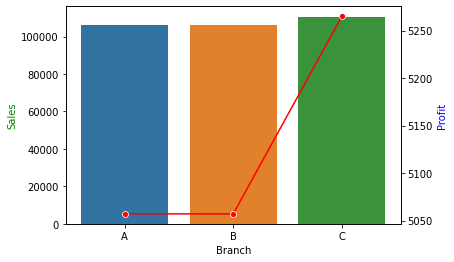

In [ ]:
# Render 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
sns.barplot(data = summary_sales_profit, x = 'Branch' , y = 'Total', ax = ax1)
sns.lineplot(data = summary_sales_profit, x = 'Branch', y = 'gross income', marker = 'o', color = 'red', ax = ax2)

# Tweak and Label
ax1.set_xlabel('Branch')
ax1.set_ylabel('Sales', color='g')
ax2.set_ylabel('Profit', color='b')

# Display
plt.show()

From the analysis above, Branch C had the highest sales and profit.

## c) The trends of sales over time for each branch

In [ ]:
# Prepare: create a summary table of sales per date per branch
summary_sales = quickmart.groupby(['date','Branch'], as_index=False).agg({'Total': np.sum})
summary_sales

,date,Branch,Total
0,2019-01-01,A,2371.3200
1,2019-01-01,B,1536.6960
2,2019-01-01,C,837.1650
3,2019-01-02,A,307.0515
4,2019-01-02,B,1162.8015
...,...,...,...
258,2019-03-29,B,2059.9320
259,2019-03-29,C,985.6980
260,2019-03-30,A,1320.6165
261,2019-03-30,B,1724.4570


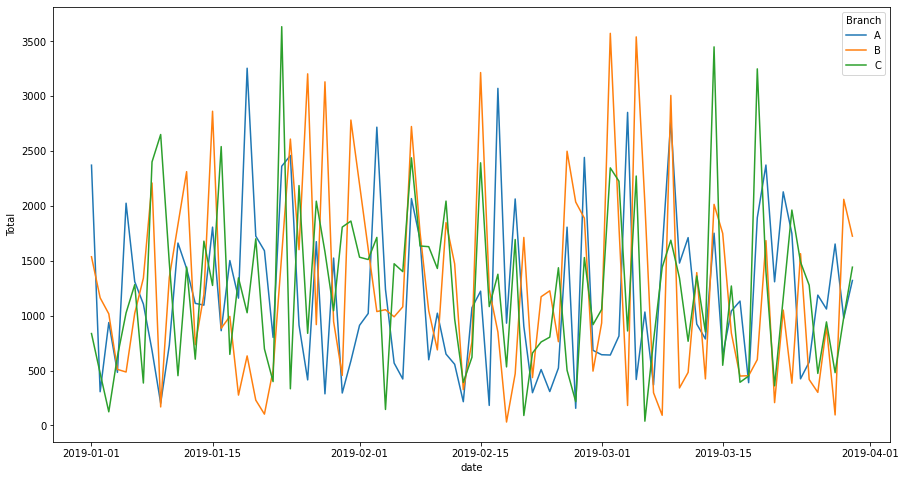

In [ ]:
# Render the plots 
plt.figure(figsize = (15,8))
sns.lineplot(x="date", y="Total", hue="Branch", data=summary_sales)

# Display the plot
fig.show()

## d) The average amount spent by customers

In [ ]:
# Prepare: create a summary table of average amount spent by customer type
summary_customer = quickmart.groupby(['Customer type'], as_index=False).agg({'Total': np.mean})
summary_customer

,Customer type,Total
0,Member,327.791305
1,Normal,318.122856


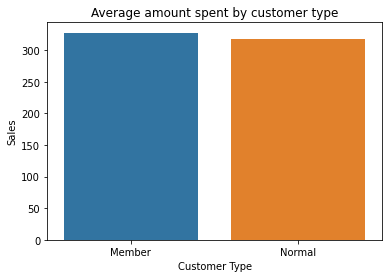

In [ ]:
# Render 
sns.barplot(data = summary_customer, x = "Customer type", y = "Total")

# Tweak and Label
plt.xlabel('Customer Type')
plt.ylabel('Sales')
plt.title('Average amount spent by customer type')

# Display
plt.show()

Observation: Members spent more on average than non-members.

In [ ]:
# Prepare: create a summary table of average amount spent by gender
summary_gender = quickmart.groupby(['Gender'], as_index=False).agg({'Total': np.mean})
summary_gender

,Gender,Total
0,Female,335.095659
1,Male,310.789226


Observation: Females spent more on average than men.

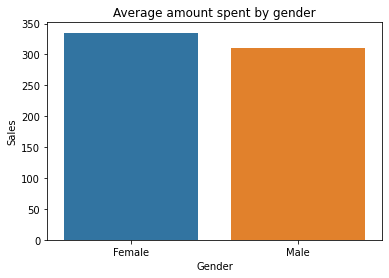

In [ ]:
# Render 
sns.barplot(data = summary_gender, x = "Gender", y = "Total")

# Tweak and Label
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.title('Average amount spent by gender')

# Display
plt.show()

## e) The average rating for each branch

In [ ]:
# Prepare: create a summary table of average rating for each branch
summary_rating = quickmart.groupby(['Branch'], as_index=False).agg({'Rating': np.mean})
summary_rating

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


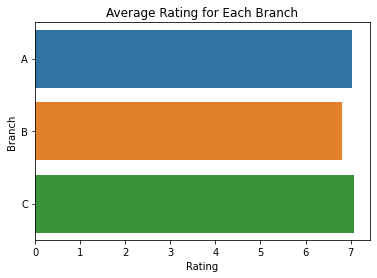

In [ ]:
# Render 
sns.barplot(data = summary_rating, x = "Rating", y = "Branch")

# Tweak and Label
plt.xlabel('Rating')
plt.ylabel('Branch')
plt.title('Average Rating for Each Branch')

# Display
plt.show()

Observation: Branch C had the highest average customer rating while Branch B had the lowest rating.

# 4) Summary of Findings





*   Branch C had the highest sales and profit
*   In terms of quantity sold the Electronic accessories category performed best
*   Females spent more on average than men
*  Members spent more on average than non-members
*  Branch C had the highest average customer rating while Branch B had the lowest rating


# 5) Recommendations



Assuming that Quick Mart's Marketing Strategy is to leverage on existing strengths, the following is recommended: 
* Quick Mart's marketing should be geared towards females and members, since they are the ones who spend the most, on average.
*   Similarly, to take advantage of the fact that the Electronic accessories category is the most popular, Quick Mart's marketing should be geared towards further promoting sales of this category.
* From the analysis, it appears that Sales and Customer rating are correlated (the highest rated branch has the highest sales and vice versa). Quick Mart should therefore tailor its marketing campaigns accordingly.

